ingresando archivo .Mat
{'123': {'val': array([[ -503,  -516,  -525, ..., -1084, -1100, -1075],
       [ 1620,  1633,  1645, ...,  1072,  1075,  1095],
       [ 2124,  2150,  2170, ...,  2156,  2175,  2170],
       ...,
       [  493,   504,   513, ..., -1019, -1015, -1008],
       [ -592,  -588,  -581, ...,    48,    51,    58],
       [-1880, -1881, -1878, ...,  -185,  -174,  -176]], dtype=int16)}}
La forma de la matriz asociada a la clave 123 es: (12, 120012)
su matriz tiene la siguiente forma(12, 120012)
bloxplot
promedio
suma de sensores


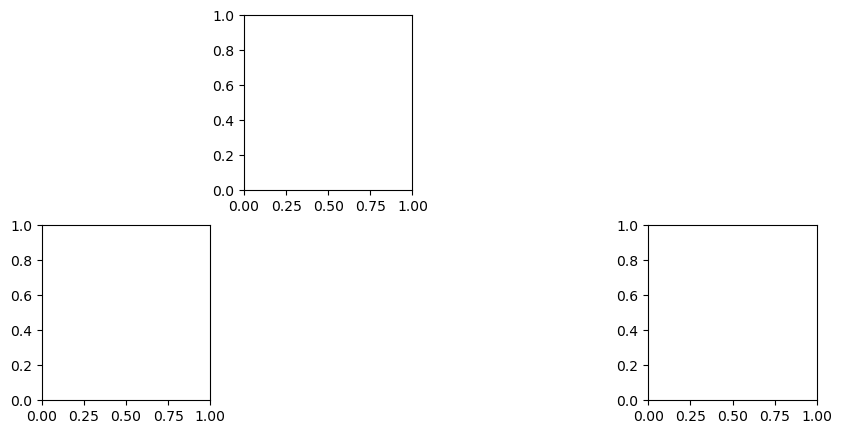

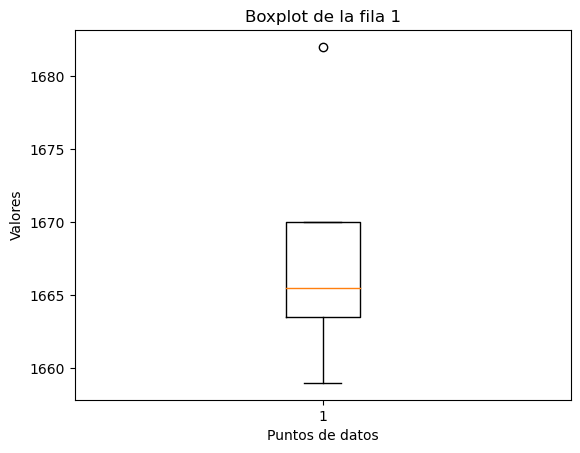

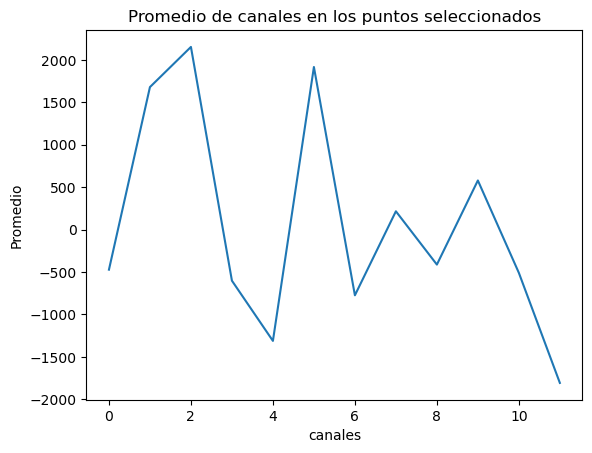

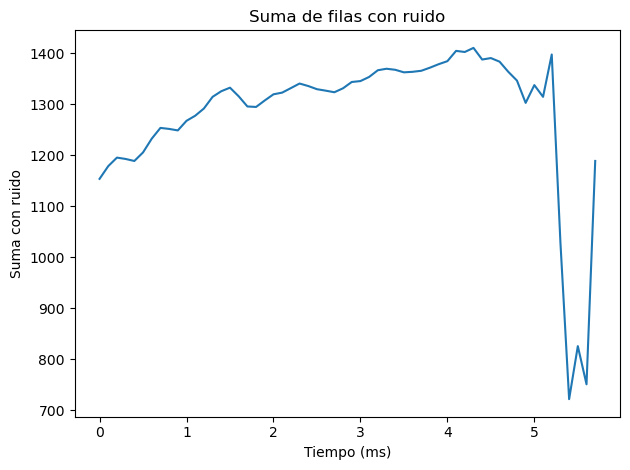

adios


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
from clases import graficadora
from clases import manejo_archivo
man = manejo_archivo()
graf = graficadora(man)
def main():
    while True:
        menu=input("""
        1. Ingresar MAT
        2. Ingresar CSV
        3. Graficar señal
        4. Mostrar información
        5. Salir
        """)
        if menu=="1":
            print("ingresando archivo .Mat")
            rorn=str(input("agregue la ruta o el niombre del archivo "))
            clave= input("agregue la clave con la cual se va a guardar el archivo ")
            man.leer_mat(rorn,clave)
            
        if menu=="2":
            print("ingresando archivo .csv")
            rorn=input("agregue la ruta o el niombre del archivo ")
            clave= input("agregue la clave con la cual se va a guardar el archivo ")
            man.leer_csv(rorn,clave)
            if man.leer_mat(rorn, clave):
                print("Archivo .mat guardado correctamente")
            else:
                print("Error al guardar el archivo .csv")
        if menu=="3":
            data=man.obtener_datos(clave)
            clave=input("ingrese la clave asociada al archivo")
            forma = graf.obtener_forma_matriz(clave)
            print(f"su matriz tiene la siguiente forma{forma}")
            print("bloxplot")
            canal=input("elija el canal(fila) para crear el grafico")
            print("promedio")
            inicio=int(input("elija el punto(columna) inicial"))
            final=int(input("elija el punto(columna) final"))
            print("suma de sensores")
            pinicio=int(input("elija el punto(columna) inicial"))
            pfinal=int(input("elija el punto(columna) final"))
            s1=int(input("elija el sensor (fila) para crear el grafico"))
            s2=int(input("elija el sensor(fila) para crear el grafico"))
            fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))
            axs[0, 0].axis('off')
            axs[0, 2].axis('off')
            axs[0, 3].axis('off')
            axs[1, 1].axis('off')
            axs[1, 2].axis('off')
            graf.crear_boxplot(data, canal, axs[1, 0])
            graf.graficar_promedio(data, inicio, final, axs[0, 1])
            graf.graficar_sensores_con_ruido(data, s1, s2, pinicio, pfinal, axs[1, 3])
            plt.tight_layout()
            plt.show()

        if menu=="4":
            print("mostrando información")
            clave=input("ingresa la clave del archivo asociado")
            print("nombre de las columnas ")
            nombres_columnas = graf.obtener_nombres_columnas(clave)
            print(nombres_columnas)
            print("histograma de columna ")
            colum=input("ingresa la columna a la que se desea hacer el histrograma ")
            graf.histograma_columna(clave, colum)
            print("creacion de nueva columna")
            c1=input("ingresa la columna 1 ")
            c2=input("ingresa la columna 2 ")
            cn=input("ingresa el nombre de la nueva columna ")
            graf.boxplot_columna_multiplicacion(clave, c1, c2, cn)
            
        if menu=="5":
            print("adios")
            break
if __name__ == "__main__":
    main()